In [1]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the  dataset
df = pd.read_csv("D:\SHRDC\PYML\credit card dataset\CC GENERAL.csv")

In [2]:
df.shape

(8950, 18)

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df = df.drop("CUST_ID", axis=1)

In [5]:
#Check missing values
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
df = df.fillna(0)

In [36]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
Cluster                             0
dtype: int64

Standardize and Normalize

Before we perform PCA, we standardize and normalize the data. Moreover, since the clustering algorithm is based on distance between data points, large magnitudes could adversely impact the outcome.

In [7]:
#Standardize and Normalize
from sklearn.preprocessing import  normalize
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
norm_df = normalize(scaled_df)

PCA

Use PCA to reduce the dimensionality of our data. Essentially, we are reducing our 17 dimensional data to n dimensions - where n is the number of components. Since clustering methods suffer from the "curse of dimensionality," we make our data less complex.

In [8]:
# Perform PCA 
pca = PCA()
pca.fit(norm_df)

PCA()

Text(0, 0.5, 'cumulative explained variance')

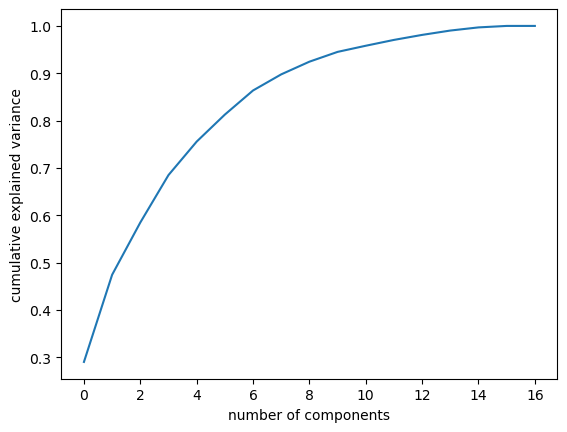

In [9]:
#Deciding how many principal components/n_components 
import numpy as np 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [10]:
np.cumsum(pca.explained_variance_ratio_)

array([0.29044997, 0.47452947, 0.58490237, 0.68505818, 0.75571567,
       0.8127604 , 0.86368729, 0.89770753, 0.92447857, 0.94517107,
       0.95813186, 0.97045662, 0.9810481 , 0.99022739, 0.99688251,
       0.9999988 , 1.        ])

In [11]:
#PCA 
n_components=7
pca_final = PCA(n_components=n_components)
pca_final.fit(norm_df)
pca_df= pca_final.fit_transform(norm_df)

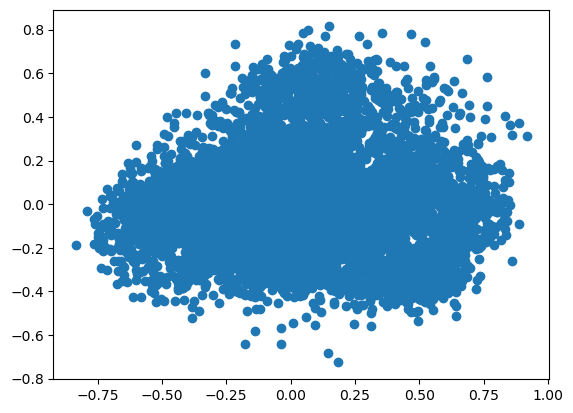

In [12]:
plt.scatter(pca_df[:,2], pca_df[:,6])

Kmeans Clustering

Recall that in order to use the Kmeans algorithm, we have to provide the number of clusters that we are trying to segment our data into. Since we do not know what is ideal, let us try a range of 2-11 clusters. We will look at metric plots to determine what works best.

In [14]:
sse = {}
n_clust = np.arange(2,11)

for i in n_clust:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(pca_df)
    sse[i] = kmeans.inertia_

d:\anacondapython\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anacondapython\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anacondapython\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anacondapython\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to supp

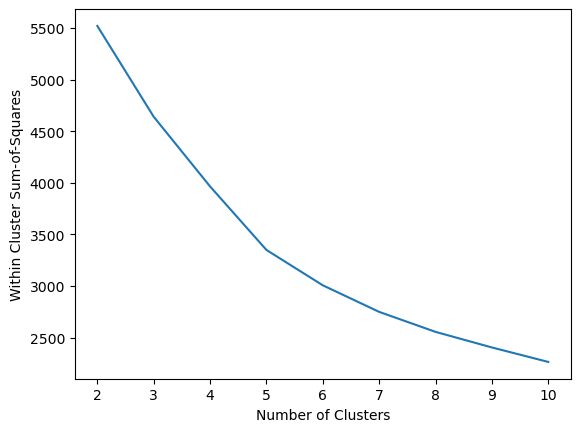

In [15]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("Within Cluster Sum-of-Squares")
plt.show()

In [16]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(pca_df)

d:\anacondapython\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=0)

d:\anacondapython\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


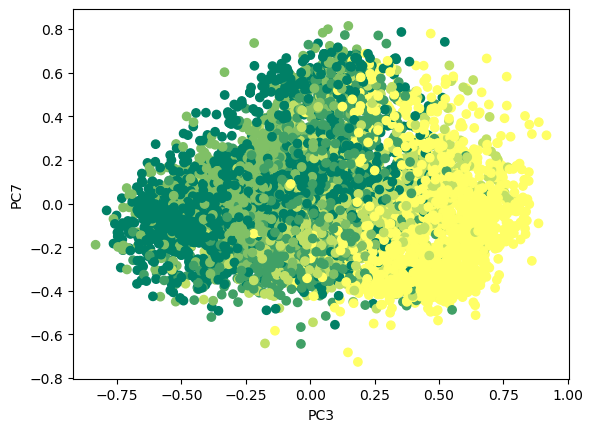

In [17]:
#Scatter plot
plt.scatter(pca_df[:,2], pca_df[:,6],
            c = KMeans(n_clusters = 5).fit_predict(pca_df),
            cmap = plt.cm.summer)
plt.xlabel("PC3")
plt.ylabel("PC7")

plt.show() 

PLot the cluster with decision boundaries.

d:\anacondapython\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anacondapython\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


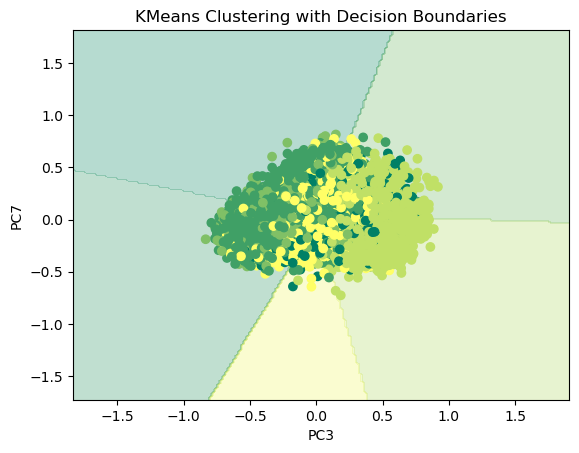

In [18]:
# Fit KMeans on the original PCA components
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(pca_df)

# Create a meshgrid to plot the decision boundary
h = 0.02  # Step size of the mesh
x_min, x_max = pca_df[:, 2].min() - 1, pca_df[:, 2].max() + 1
y_min, y_max = pca_df[:, 6].min() - 1, pca_df[:, 6].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh using the trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()),
                          np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel()),
                            np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# Plot the contour plot
plt.contourf(xx, yy, Z, cmap=plt.cm.summer, alpha=0.3)

# Scatter plot for the data points
plt.scatter(pca_df[:, 2], pca_df[:, 6],
            c=KMeans(n_clusters=5).fit_predict(pca_df),
            cmap=plt.cm.summer)
plt.xlabel("PC3")
plt.ylabel("PC7")
plt.title('KMeans Clustering with Decision Boundaries')
plt.show()

The decision boundary is much clearer now, and we also see the center of the 5 identified clusters. Our final objective is to try and make sense of these clusters.

In [28]:
for col_name in ['PURCHASES', 'PURCHASES_FREQUENCY']:
    col_index = df.columns.get_loc(col_name)
    
    print(f"\nCluster Centers for '{col_name}':")
    for i, center in enumerate(kmeans.cluster_centers_):
        print(f"  Center of Cluster {i+1} ({col_name}): {center[col_index]:.4f}")


Cluster Centers for 'PURCHASES':
  Center of Cluster 1 (PURCHASES): -0.0149
  Center of Cluster 2 (PURCHASES): -0.2035
  Center of Cluster 3 (PURCHASES): 0.1279
  Center of Cluster 4 (PURCHASES): -0.2475
  Center of Cluster 5 (PURCHASES): 0.4700

Cluster Centers for 'PURCHASES_FREQUENCY':
  Center of Cluster 1 (PURCHASES_FREQUENCY): -0.0025
  Center of Cluster 2 (PURCHASES_FREQUENCY): 0.0563
  Center of Cluster 3 (PURCHASES_FREQUENCY): -0.0290
  Center of Cluster 4 (PURCHASES_FREQUENCY): 0.0573
  Center of Cluster 5 (PURCHASES_FREQUENCY): -0.1148



PURCHASES:

Cluster 1 (Center: -0.0149): This cluster has a slightly below-average level of purchases.

Cluster 2 (Center: -0.2035): This cluster has a relatively low level of purchases.

Cluster 3 (Center: 0.1279): This cluster has an above-average level of purchases.

Cluster 4 (Center: -0.2475): This cluster has a significantly low level of purchases.

Cluster 5 (Center: 0.4700): This cluster has a significantly high level of purchases.

PURCHASES_FREQUENCY:

Cluster 1 (Center: -0.0025): This cluster has a slightly below-average purchase frequency.

Cluster 2 (Center: 0.0563): This cluster has an above-average purchase frequency.

Cluster 3 (Center: -0.0290): This cluster has a slightly below-average purchase frequency.

Cluster 4 (Center: 0.0573): This cluster has an above-average purchase frequency.

Cluster 5 (Center: -0.1148): This cluster has a below-average purchase frequency.

Interpretation:

Cluster 5: This cluster stands out for both 'PURCHASES' and 'PURCHASES_FREQUENCY,' indicating a group 

of customers with significantly high levels of purchases and a below-average purchase frequency.

Cluster 2: This cluster has both a low level of purchases and a below-average purchase frequency.

Cluster 3: This cluster has above-average purchases but a slightly below-average purchase frequency.

Cluster 4: This cluster has a significantly low level of purchases and an above-average purchase frequency.

Cluster 1: This cluster shows a mix of slightly below-average purchases and a slightly below-average purchase frequency.


Conclusion

Cluster 5 (High Purchases, Low Frequency)

Cluster 2 (Low Purchases, Low Frequency)

Cluster 3 (High Purchases, Below-Average Frequency)

Cluster 4 (Low Purchases, High Frequency)

Cluster 1 (Below-Average Purchases, Below-Average Frequency)